# Multiple Linear Regression using statsmodel libraries

# Predicting the Sold Price(Auction price) of IPL players

## The Data set consists of the performance of 130 players measured through various performance metrics. 

## 1.1 Import the necessary packages

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [108]:
import warnings
warnings.filterwarnings('ignore')

## 1.2 Loading Data set into Pandas Data Frame

In [109]:
ipl_auction_df = pd.read_csv("IPLdataset.csv")

In [110]:
type(ipl_auction_df)

pandas.core.frame.DataFrame

## 1.3 Displaying first few reconds of the data set

In [111]:
ipl_auction_df.head()

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR -B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,...,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,...,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,...,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,...,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,...,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


## 1.4 Checking the Data set summary

In [112]:
# Dimension or size of the Data frame
ipl_auction_df.shape

(130, 26)

In [113]:
# Detailed summary about the data set
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR -B            130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

In [114]:
# Display first five players name
ipl_auction_df['PLAYER NAME'][0:5]

0     Abdulla, YA
1    Abdur Razzak
2     Agarkar, AB
3       Ashwin, R
4    Badrinath, S
Name: PLAYER NAME, dtype: object

In [115]:
# Display first five players name along wth their country name
ipl_auction_df[['PLAYER NAME','COUNTRY']][0:5]

,PLAYER NAME,COUNTRY
0,"Abdulla, YA",SA
1,Abdur Razzak,BAN
2,"Agarkar, AB",IND
3,"Ashwin, R",IND
4,"Badrinath, S",IND


In [116]:
# Display data using row index - displaying from 4th player to 8th player
ipl_auction_df.iloc[4:9,1:4]

,PLAYER NAME,AGE,COUNTRY
4,"Badrinath, S",2,IND
5,"Bailey, GJ",2,AUS
6,"Balaji, L",2,IND
7,"Bollinger, DE",2,AUS
8,"Botha, J",2,SA


In [117]:
## Checking the the number of players from each country
ipl_auction_df.COUNTRY.value_counts()


IND    53
AUS    22
SA     16
SL     12
PAK     9
NZ      7
WI      6
ENG     3
ZIM     1
BAN     1
Name: COUNTRY, dtype: int64

In [118]:
## Checking the the number of players from each country in percentage
ipl_auction_df.COUNTRY.value_counts(normalize=True)*100

IND    40.769231
AUS    16.923077
SA     12.307692
SL      9.230769
PAK     6.923077
NZ      5.384615
WI      4.615385
ENG     2.307692
ZIM     0.769231
BAN     0.769231
Name: COUNTRY, dtype: float64

### Most Players auctioned are from India

In [119]:
# Cross Tabulation of Playing Role and Age from each age category
pd.crosstab(ipl_auction_df['AGE'], ipl_auction_df['PLAYING ROLE'])


PLAYING ROLE,Allrounder,Batsman,Bowler,W. Keeper
AGE,,,,
1,4,5,7,0
2,25,21,29,11
3,6,13,8,1


### Most Players auctioned are from age category 2. There are more bowlers than any otherplaying roles in category 1 and 2. In category 3, there are more batsman than other playing roles.

In [120]:
# Sort the Players based on Sold price and display the top 5 players
ipl_auction_df[['PLAYER NAME','SOLD PRICE']].sort_values('SOLD PRICE', ascending=False)[0:5]

,PLAYER NAME,SOLD PRICE
93,"Sehwag, V",1800000
127,Yuvraj Singh,1800000
50,"Kohli, V",1800000
111,"Tendulkar, SR",1800000
113,"Tiwary, SS",1600000


In [121]:
# Find who got the maximum premium
# Create a new column Premium by taking the difference between sold price and base price
ipl_auction_df['Premium'] = ipl_auction_df['SOLD PRICE']- ipl_auction_df['BASE PRICE']

In [122]:
ipl_auction_df[['PLAYER NAME','SOLD PRICE', 'BASE PRICE','Premium']][0:5]

,PLAYER NAME,SOLD PRICE,BASE PRICE,Premium
0,"Abdulla, YA",50000,50000,0
1,Abdur Razzak,50000,50000,0
2,"Agarkar, AB",350000,200000,150000
3,"Ashwin, R",850000,100000,750000
4,"Badrinath, S",800000,100000,700000


In [123]:
# Finding Average Sold price for each age category
ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean()

AGE
1    720250.000000
2    484534.883721
3    520178.571429
Name: SOLD PRICE, dtype: float64

### The average price is high in Category 1 and lowest in category 2

In [124]:
# Finding Average Sold price for each playing role 
ipl_auction_df.groupby('PLAYING ROLE')['SOLD PRICE'].mean()

PLAYING ROLE
Allrounder    519571.428571
Batsman       647435.897436
Bowler        419977.272727
W. Keeper     487083.333333
Name: SOLD PRICE, dtype: float64

### The average price is high for Batsman and lowest for Bowler

In [125]:
# Find Player who hit more than 80 sixers in IPL tournament
ipl_auction_df[ipl_auction_df['SIXERS']>80][['PLAYER NAME','SIXERS']]

,PLAYER NAME,SIXERS
26,"Gayle, CH",129
28,"Gilchrist, AC",86
82,"Pathan, YK",81
88,"Raina, SK",97
97,"Sharma, RG",82


In [126]:
# Drop Sl.NO as we don't need it for EDA
ipl_auction_df.drop('Sl.NO.', inplace=True, axis=1)

In [127]:
ipl_auction_df.head()

,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,ODI-WKTS,...,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE,Premium
0,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00,0,...,0,307,15,20.47,8.90,13.93,2009,50000,50000,0
1,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41,185,...,0,29,0,0.00,14.50,0.00,2008,50000,50000,0
2,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62,288,...,5,1059,29,36.52,8.81,24.90,2008,200000,350000,150000
3,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56,51,...,0,1125,49,22.96,6.23,22.14,2011,100000,850000,750000
4,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93,0,...,28,0,0,0.00,0.00,0.00,2011,100000,800000,700000


## 1.5 Exploration of Data using Data Visualization

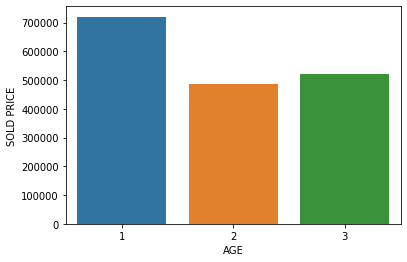

In [128]:
## Display Average Sold Price by Age category
sold_price_by_age = ipl_auction_df.groupby('AGE')['SOLD PRICE'].mean().reset_index()
sn.barplot(x='AGE', y='SOLD PRICE', data= sold_price_by_age);

(array([16., 11., 16., 16.,  9., 12.,  5., 15.,  8.,  6.,  6.,  1.,  0.,
         0.,  1.,  0.,  1.,  3.,  0.,  4.]),
 array([  20000.,  109000.,  198000.,  287000.,  376000.,  465000.,
         554000.,  643000.,  732000.,  821000.,  910000.,  999000.,
        1088000., 1177000., 1266000., 1355000., 1444000., 1533000.,
        1622000., 1711000., 1800000.]),
 <a list of 20 Patch objects>)

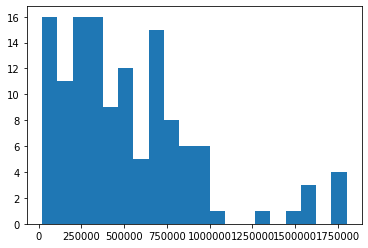

In [129]:
# Histogram for SOLD PRice
plt.hist(ipl_auction_df['SOLD PRICE'], bins=20)

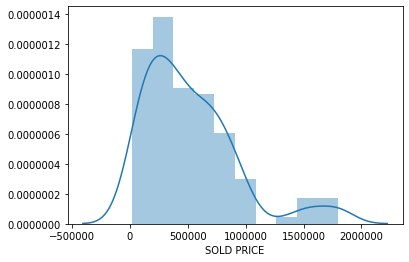

In [130]:
# Distribution or density plot- it depicts the distribution of data over the continuous interval
sn.distplot(ipl_auction_df['SOLD PRICE'])

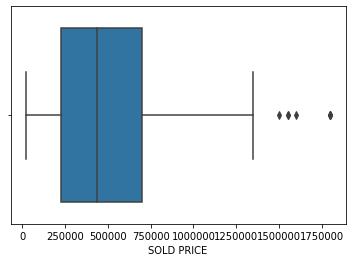

In [131]:
# Variabilty of data and existence of outliers can be checked with the help of box plot
sn.boxplot(ipl_auction_df['SOLD PRICE'])

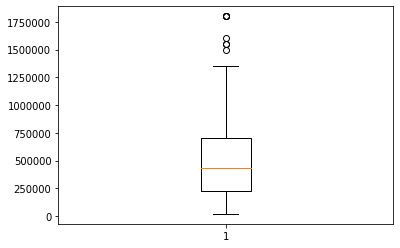

In [132]:
box= plt.boxplot(ipl_auction_df['SOLD PRICE'])

In [133]:
# Obtain min nd max prices
[item.get_ydata()[0] for item in box['caps']]

[20000.0, 1350000.0]

In [134]:
# Obtain 25 and 75 quantiles
[item.get_ydata()[0] for item in box['whiskers']]

[225000.0, 700000.0]

In [135]:
# Obtain Inter-Quartile Range -IQR
[item.get_ydata()[0] for item in box['medians']]

[437500.0]

In [136]:
# The box plot above shows outliers wuth some high sold price. Find the name of those players
ipl_auction_df[ipl_auction_df['SOLD PRICE']>1350000.0][['PLAYER NAME','PLAYING ROLE','SOLD PRICE']]


,PLAYER NAME,PLAYING ROLE,SOLD PRICE
15,"Dhoni, MS",W. Keeper,1500000
23,"Flintoff, A",Allrounder,1550000
50,"Kohli, V",Batsman,1800000
83,"Pietersen, KP",Batsman,1550000
93,"Sehwag, V",Batsman,1800000
111,"Tendulkar, SR",Batsman,1800000
113,"Tiwary, SS",Batsman,1600000
127,Yuvraj Singh,Batsman,1800000


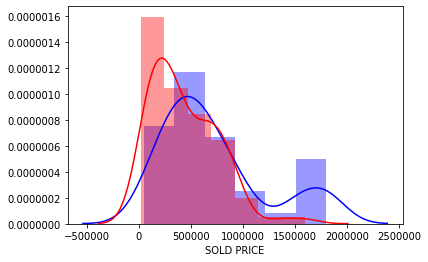

In [137]:
# Compare SOLD Price with and without Captaincy Exp
sn.distplot(ipl_auction_df[ipl_auction_df['CAPTAINCY EXP']== 1]['SOLD PRICE'], color='b', label='Captaincy Exp')
sn.distplot(ipl_auction_df[ipl_auction_df['CAPTAINCY EXP']== 0]['SOLD PRICE'], color='r', label='No Captaincy Exp')

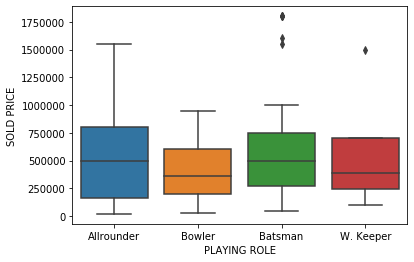

In [138]:
# Comparing sold price for players with different playing role
sn.boxplot(x= 'PLAYING ROLE', y='SOLD PRICE', data = ipl_auction_df)

## Encoding Categorical Features

In [139]:
ipl_auction_df.columns

Index(['PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS',
       'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS ', 'AVE', 'SR -B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE', 'Premium'],
      dtype='object')

In [140]:
X_Features =['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS','T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
             'CAPTAINCY EXP', 'RUNS-S', 'HS ', 'AVE', 'SR -B', 'SIXERS', 'RUNS-C','WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [141]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP']

In [142]:
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_Features], columns=categorical_features, drop_first=True )

In [143]:
ipl_auction_df.columns

Index(['PLAYER NAME', 'AGE', 'COUNTRY', 'TEAM', 'PLAYING ROLE', 'T-RUNS',
       'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'CAPTAINCY EXP', 'RUNS-S', 'HS ', 'AVE', 'SR -B', 'SIXERS', 'RUNS-C',
       'WKTS', 'AVE-BL', 'ECON', 'SR-BL', 'AUCTION YEAR', 'BASE PRICE',
       'SOLD PRICE', 'Premium'],
      dtype='object')

In [169]:
X_Features =ipl_auction_encoded_df.columns

## Splitting the data set into training and test sets

In [170]:
from sklearn.model_selection import train_test_split

In [171]:
import statsmodels.api as sm

In [172]:
X= sm.add_constant(ipl_auction_encoded_df)
Y= ipl_auction_df['SOLD PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [173]:
ipl_model = sm.OLS(y_train, X_train).fit()

In [174]:
ipl_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2019-12-03 13:41        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR -B                    -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

## Get the Significant features

In [175]:
def get_significant_vars( lm ):
    var_p_vals_df = pd.DataFrame( lm.pvalues )
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals', 'vars']
    return list( var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'] )

In [176]:
significant_vars = get_significant_vars( ipl_model )

In [177]:
significant_vars

['HS ', 'AVE', 'AGE_2', 'COUNTRY_ENG']

## The model says that only 'HS ', 'AVE', 'AGE_2', 'COUNTRY_ENG' are significant. This is not very intuitive and could be result of multi-collinearity effect

## Handling Multi-Collinearity 

In [183]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif(X):
    X_matrix = X.as_matrix()
    vif = [variance_inflation_factor(X_matrix,i) for i in range (X_matrix.shape[1])]
    vif_df = pd.DataFrame()
    vif_df['column'] = X.columns
    vif_df['VIF'] = vif
    return vif_df

In [184]:
vif_factors = get_vif(X[X_Features])
vif_factors

,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR -B,21.576204


## Checking the correlation of columns with large VIF

In [188]:
cols_large_VIF = vif_factors[vif_factors['VIF']>4].column
cols_large_VIF

0                   T-RUNS
1                   T-WKTS
2               ODI-RUNS-S
3                 ODI-SR-B
4                 ODI-WKTS
5                ODI-SR-BL
6                   RUNS-S
7                      HS 
8                      AVE
9                    SR -B
10                  SIXERS
11                  RUNS-C
12                    WKTS
13                  AVE-BL
14                    ECON
15                   SR-BL
16                   AGE_2
20             COUNTRY_IND
27    PLAYING ROLE_Batsman
30         CAPTAINCY EXP_1
Name: column, dtype: object

In [193]:
list(cols_large_VIF)

['T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'RUNS-S',
 'HS ',
 'AVE',
 'SR -B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL',
 'AGE_2',
 'COUNTRY_IND',
 'PLAYING ROLE_Batsman',
 'CAPTAINCY EXP_1']

Text(0.5, 1, 'Heat map depicting correlation between features')

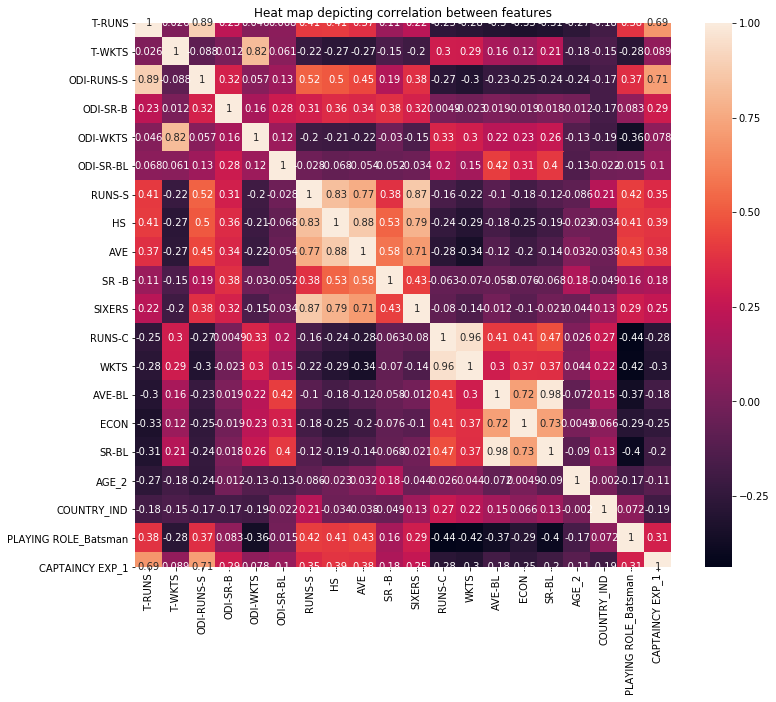

In [189]:
# Heat map for VIF more than 4
plt.figure(figsize=(12,10))
sn.heatmap(X[cols_large_VIF].corr(), annot=True)
plt.title("Heat map depicting correlation between features")

## Note: To avoid multi-collinearity , keep only one column from each group of highly correlated variables and remove others.

In [194]:
cols_to_be_removed = ['T-RUNS','T-WKTS','RUNS-S','HS ','AVE','RUNS-C','SR -B','AVE-BL','ECON','ODI-SR-B', 'ODI-RUNS-S','AGE_2',
                      'SR-BL']
 

In [195]:
X_new_Features =list(set(X_Features ) - set(cols_to_be_removed))

In [196]:
get_vif(X[X_new_Features])

,column,VIF
0,COUNTRY_ZIM,1.205305
1,COUNTRY_BAN,1.094293
2,ODI-WKTS,2.742889
3,ODI-SR-BL,2.822148
4,COUNTRY_NZ,1.173418
5,COUNTRY_WI,1.194093
6,COUNTRY_PAK,1.334773
7,WKTS,2.883101
8,PLAYING ROLE_W. Keeper,1.900941
9,PLAYING ROLE_Batsman,2.680207


### Note: All variables have VIF less than 4. So no multi-colleniarity exists.

## Build the model after removing multi-collinearity

In [197]:
X_train =X_train[X_new_Features]

In [198]:
ipl_model2= sm.OLS(y_train, X_train).fit()

In [200]:
ipl_model2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                      OLS                Adj. R-squared (uncentered):   0.728     
Dependent Variable:         SOLD PRICE         AIC:                           2965.1080 
Date:                       2019-12-03 13:59   BIC:                           3012.7070 
No. Observations:           104                Log-Likelihood:                -1464.6   
Df Model:                   18                 F-statistic:                   16.49     
Df Residuals:               86                 Prob (F-statistic):            1.13e-20  
R-squared (uncentered):     0.775              Scale:                         1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [203]:
significant_vars= get_significant_vars(ipl_model2)

### Note: Based on p-value only variables 'CAPTAINCY EXP_1', 'SIXERS', 'COUNTRY_IND', 'COUNTRY_ENG' are significant. And model can predict 77 % of variance in the sold price

In [204]:
X_train = X_train[significant_vars]

In [205]:
ipl_model3= sm.OLS(y_train, X_train).fit()

In [206]:
ipl_model3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.704     
Dependent Variable:     SOLD PRICE       AIC:                         2961.8089 
Date:                   2019-12-03 14:35 BIC:                         2972.3864 
No. Observations:       104              Log-Likelihood:              -1476.9   
Df Model:               4                F-statistic:                 62.77     
Df Residuals:           100              Prob (F-statistic):          1.97e-26  
R-squared (uncentered): 0.715            Scale:                       1.3164e+11
--------------------------------------------------------------------------------
                     Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
--------------------------------------------------------------------------------
CAPTAINCY EXP_1   359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
SIXERS              8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
COUNTRY_IND       387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG       731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
--------------------------------------------------------------------------------
Omnibus:                   1.130             Durbin-Watson:                2.238
Prob(Omnibus):             0.568             Jarque-Bera (JB):             0.874
Skew:                      0.223             Prob(JB):                     0.646
Kurtosis:                  3.046             Condition No.:                165  
================================================================================

"""

## Note: All variables are statistically signficant. Overall model is also significant because the F-statistic is significant.
## The model can explain 71.5 % of the variance in SOLD PRICE as the R-square value is 0.715.

## Residual analysis of the model.

### 1. Normality test using p-p plot

In [216]:
def draw_pp_plot(model, title):
    probplot = sm.ProbPlot(model.resid);  
    plt.figure(figsize=(8,6));
    probplot.ppplot(line ='45');
    plt.title(title);
    plt.show();
    

<Figure size 576x432 with 0 Axes>

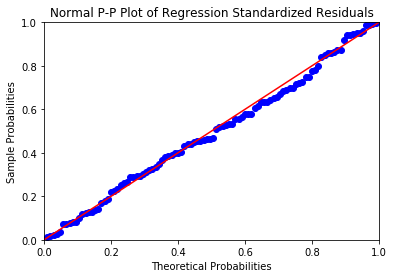

In [217]:
draw_pp_plot(ipl_model3,'Normal P-P Plot of Regression Standardized Residuals')

In [220]:
def get_std_values(vals):
    return(vals-vals.mean())/vals.std()

In [221]:
def residual_plot(fitted, resid, title):
    plt.scatter(get_std_values(fitted), get_std_values(resid))
    plt.title(title)
    plt.xlabel("Standardised Predicted values")
    plt.ylabel("Standardised Residual Values")
    plt.show()

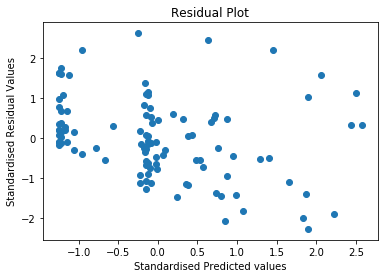

In [222]:
residual_plot(ipl_model3.fittedvalues, ipl_model3.resid, "Residual Plot")

### Note: The residula plot do not show any signs of heteroscedasticity.

## Transforming the Response variable to get better performance

In [223]:
# Create a new response variable by taking the square root of the existing values
y_train_new = np.sqrt(y_train)

In [224]:
ipl_model4= sm.OLS(y_train_new, X_train).fit()

In [225]:
ipl_model4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.741     
Dependent Variable:     SOLD PRICE       AIC:                         1527.9999 
Date:                   2019-12-03 15:01 BIC:                         1538.5775 
No. Observations:       104              Log-Likelihood:              -760.00   
Df Model:               4                F-statistic:                 75.29     
Df Residuals:           100              Prob (F-statistic):          2.63e-29  
R-squared (uncentered): 0.751            Scale:                       1.3550e+05
-----------------------------------------------------------------------------------
                    Coef.      Std.Err.      t       P>|t|      [0.025      0.975] 
-----------------------------------------------------------------------------------
CAPTAINCY EXP_1    417.7575     76.0204    5.4953    0.0000    266.9352    568.5799
SIXERS               8.5338      1.6995    5.0213    0.0000      5.1620     11.9055
COUNTRY_IND        490.7089     63.9238    7.6765    0.0000    363.8860    617.5318
COUNTRY_ENG        563.0261    217.2801    2.5912    0.0110    131.9486    994.1036
--------------------------------------------------------------------------------
Omnibus:                   0.017             Durbin-Watson:                1.879
Prob(Omnibus):             0.992             Jarque-Bera (JB):             0.145
Skew:                      0.005             Prob(JB):                     0.930
Kurtosis:                  2.817             Condition No.:                165  
================================================================================

"""

### Note that the R-square value has been increased from 71% to 75%. 

<Figure size 576x432 with 0 Axes>

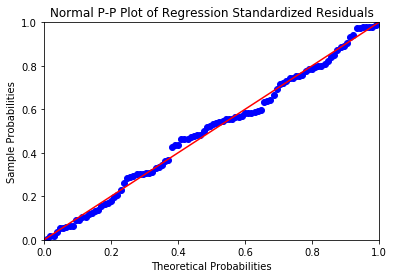

In [226]:
draw_pp_plot(ipl_model4, 'Normal P-P Plot of Regression Standardized Residuals')

## Making prediction on validation set

In [227]:
## As model 4 is built using the square root of response variable we need to square the predicted values of SOLD PRICE
y_pred = np.power(ipl_model4.predict(X_test[X_train.columns]),2)

### Measuring RMSE

In [228]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

496151.1812255839

### Measuring R-square value

In [229]:
from sklearn import metrics
np.round(metrics.r2_score(y_pred,y_test),2)

0.44